<a href="https://colab.research.google.com/github/Akash743/Mathematical-Optimization/blob/main/Testing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline



In [5]:
df = pd.read_excel('testing.xlsx',sheet_name="Raw")
df.columns = ['Month', 'Month_Year', 'Week', 'Week2', 'month_nr', 'Year', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score','Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'Platform1_imp',
       'Platform2_imp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']
##changing TV to Platform1, Platform2...these are livestream platforms


useful = ['DAU', 'Covid_index', 'Brand_score','Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'Platform1_imp',
       'Platform2_imp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']
df.head()

,Month,Month_Year,Week,Week2,month_nr,Year,week_nr,EndPeriod,DAU,Covid_index,...,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,2020-01-01,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,712379.734440,0.00000,...,0,0,0,0,5788,0,22537,0,40497,0
1,2020-01-02,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,715694.909520,0.00000,...,0,0,0,0,4492,0,18279,0,41306,0
2,2020-01-03,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,670894.701600,3.39251,...,0,0,0,0,4881,0,17170,0,32531,0
3,2020-01-04,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,718422.623484,3.39251,...,0,0,0,0,5842,0,20261,0,32502,0
4,2020-01-05,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,732491.460708,3.39251,...,0,0,0,0,4351,0,18472,0,30761,0


In [6]:
df.columns

Index(['Month', 'Month_Year', 'Week', 'Week2', 'month_nr', 'Year', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'Platform1_imp', 'Platform2_imp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp'],
      dtype='object')

In [ ]:
df.head()

,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,EndPeriod,DAU,Covid_index,...,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,2020-01-01,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,712379.734440,0.00000,...,0,0,0,0,5788,0,22537,0,40497,0
1,2020-01-02,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,715694.909520,0.00000,...,0,0,0,0,4492,0,18279,0,41306,0
2,2020-01-03,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,670894.701600,3.39251,...,0,0,0,0,4881,0,17170,0,32531,0
3,2020-01-04,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,718422.623484,3.39251,...,0,0,0,0,5842,0,20261,0,32502,0
4,2020-01-05,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,732491.460708,3.39251,...,0,0,0,0,4351,0,18472,0,30761,0


In [ ]:
df2 = df.copy()

df2 = df2[['Month', 'Month_Year', 'Week', 'Year', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'Platform1_imp', 'Platform2_imp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']]

In [ ]:
df2.columns = ['Date', 'Month_Year', 'Week', 'Year', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'Platform1_imp', 'Platform2_imp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              700 non-null    datetime64[ns]
 1   Month_Year         700 non-null    object        
 2   Week               700 non-null    object        
 3   Week2              700 non-null    object        
 4   Year               700 non-null    object        
 5   month_nr           700 non-null    int64         
 6   week_nr            700 non-null    int64         
 7   EndPeriod          700 non-null    int64         
 8   DAU                700 non-null    float64       
 9   Covid_index        700 non-null    float64       
 10  Brand_score        700 non-null    float64       
 11  Vouchers_P1        700 non-null    float64       
 12  Vouchers_P2        700 non-null    float64       
 13  Meta_video_imp     700 non-null    float64       
 14  Meta_nonvi

In [ ]:
dm.columns

Index(['EndPeriod', 'Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr',
       'week_nr', 'Vouchers_P1', 'Vouchers_P2', 'Meta_video', 'Meta_nonvideo',
       'YT', 'TikTok', 'TV_news', 'TV_ent', 'Own_digital_1', 'Own_digital_2',
       'Insta_all', 'Insta_own'],
      dtype='object')

In [ ]:
dm2 = dm.copy()

dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EndPeriod      700 non-null    datetime64[ns]
 1   Month          700 non-null    object        
 2   Month_Year     700 non-null    object        
 3   Week           700 non-null    object        
 4   Week2          700 non-null    object        
 5   Year           700 non-null    int64         
 6   month_nr       700 non-null    int64         
 7   week_nr        700 non-null    int64         
 8   Vouchers_P1    700 non-null    float64       
 9   Vouchers_P2    700 non-null    float64       
 10  Meta_video     700 non-null    float64       
 11  Meta_nonvideo  700 non-null    float64       
 12  YT             700 non-null    float64       
 13  TikTok         700 non-null    float64       
 14  TV_news        700 non-null    int64         
 15  TV_ent         700 non-

In [ ]:
df[useful].describe().T


,count,mean,std,min,25%,50%,75%,max
DAU,700.0,2.654701e+06,1.419001e+06,652388.164968,1.278279e+06,2.611585e+06,3.802836e+06,6.682087e+06
Covid_index,700.0,5.921501e+01,1.831229e+01,0.000000,5.747695e+01,6.303327e+01,7.436339e+01,7.572257e+01
Brand_score,700.0,7.513131e+01,1.344567e+01,29.487051,6.912662e+01,7.757404e+01,8.376517e+01,9.715482e+01
Vouchers_P1,700.0,1.986808e+05,1.633120e+05,0.000000,8.545850e+04,1.469680e+05,2.979170e+05,8.573060e+05
Vouchers_P2,700.0,8.865821e+04,4.074715e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.469580e+06
Meta_video_imp,700.0,1.507641e+04,3.973953e+04,0.000000,0.000000e+00,0.000000e+00,9.921500e+03,2.136240e+05
Meta_nonvideo_imp,700.0,1.239217e+04,3.736578e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.181420e+05
YT_imp,700.0,3.576956e+04,6.206283e+04,0.000000,0.000000e+00,0.000000e+00,5.126250e+04,2.714510e+05
TikTok_imp,700.0,1.593577e+04,4.258964e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.805620e+05
Platform1_imp,700.0,4.218887e+04,5.799845e+04,0.000000,0.000000e+00,7.645500e+03,7.968150e+04,3.645480e+05


In [ ]:
dfm = df.groupby(by='Month_Year').sum()

Text(0.5, 0, 'DAU')

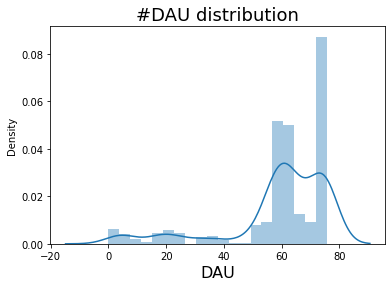

In [ ]:
sns.distplot(df['Covid_index'],kde = True)
plt.title('#DAU distribution', fontsize=18)
plt.xlabel('DAU', fontsize=16)
#plt.ylabel('Frequency', fontsize=16)

**Grouping for IVs(except Brand Score, covid, DAU) is done along their weekly sum **

In [ ]:
#Averaging dv,brand_score, covid_index
#Summing rest all
date_cols = ['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod']
df_dv = df[['Week2','Month_Year','Year','DAU','Brand_score','Covid_index']].groupby(by='Week2').mean()
df_iv = df[[x for x in df.columns if x not in ['DAU','Brand_score','Covid_index','Year','month_nr', 'week_nr',
       'EndPeriod']]].groupby('Week2').sum()
dff = pd.concat([df_iv,df_dv[['DAU','Brand_score','Covid_index']]],axis=1)

df['Year'] = df['Week2'].apply(lambda x: int(x[-4:]))

In [ ]:
dff = dff.reset_index()   #as Week 2 became the index on grouping df on that.

dff['Year'] = dff['Week2'].apply(lambda x: int(x[-4:]))

dff = dff[['Week2','Year','DAU', 'Brand_score', 'Covid_index', 'Vouchers_P1', 'Vouchers_P2', 'Meta_video_imp',
       'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'Platform1_imp',
       'Platform2_imp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp',
       'Insta_own_imp']]

In [ ]:
dff.shape,df_dv.shape,df_iv.shape

((102, 17), (102, 3), (102, 12))

In [ ]:
dff = pd.read_csv('weekly_grouped_data.csv')
dff = dff.iloc[:,1:]
dff.head()

,Week2,Year,DAU,Brand_score,Covid_index,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,TV_news_grp,TV_ent_grp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,WEEK 01 2020,2020,709976.6860,29.603407,2.035506,436939.5,0.0,0.0,0.0,0.0,0.0,25354,0.0,96719,0,177595.5,0
1,WEEK 02 2020,2020,742445.7669,43.270272,3.392510,324385.5,0.0,0.0,0.0,0.0,0.0,49478,0.0,177158,0,276222.0,0
2,WEEK 03 2020,2020,810328.1152,44.899086,3.880261,890158.5,0.0,0.0,0.0,0.0,0.0,80489,0.0,147509,0,316443.0,0
3,WEEK 04 2020,2020,709779.2725,41.746858,5.099639,765492.0,0.0,0.0,0.0,0.0,0.0,47633,0.0,153474,0,255862.5,0
4,WEEK 05 2020,2020,787788.3795,43.188335,7.522860,1119343.5,0.0,0.0,0.0,0.0,0.0,62818,0.0,190158,0,277050.0,0


<Figure size 1584x360 with 0 Axes>

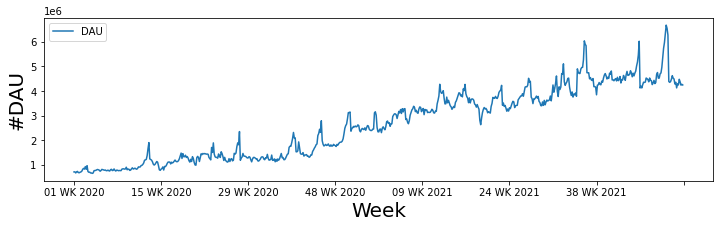

In [ ]:
f= plt.figure(figsize=(22,5))
p = df[['DAU','Week2']].set_index('Week2').plot(legend=True);#
p.set_xlabel("Week", fontsize = 20)
p.set_ylabel("#DAU", fontsize = 20)
plt.gcf().set_size_inches(12, 3)

<Figure size 1296x216 with 0 Axes>

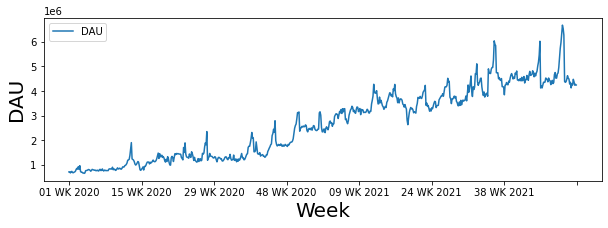

<Figure size 1296x216 with 0 Axes>

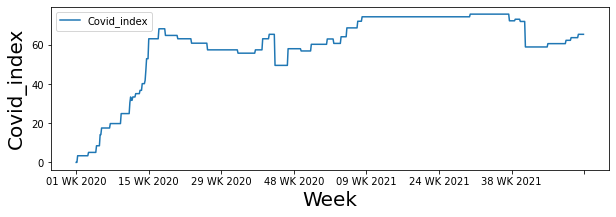

<Figure size 1296x216 with 0 Axes>

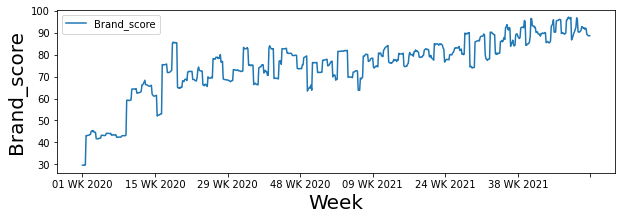

<Figure size 1296x216 with 0 Axes>

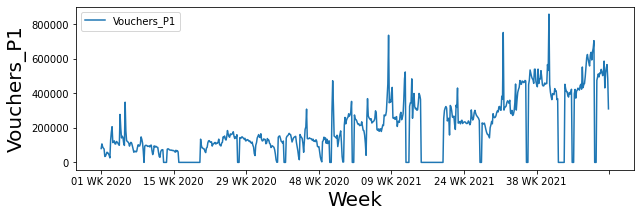

<Figure size 1296x216 with 0 Axes>

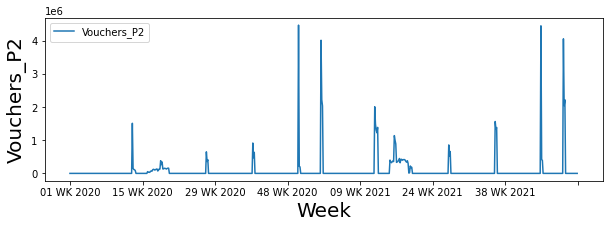

<Figure size 1296x216 with 0 Axes>

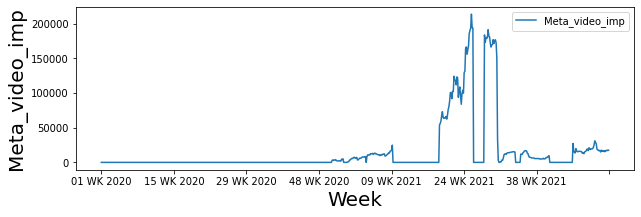

<Figure size 1296x216 with 0 Axes>

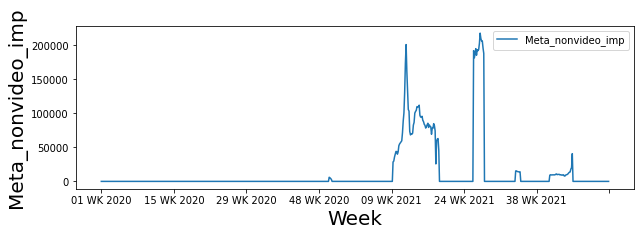

<Figure size 1296x216 with 0 Axes>

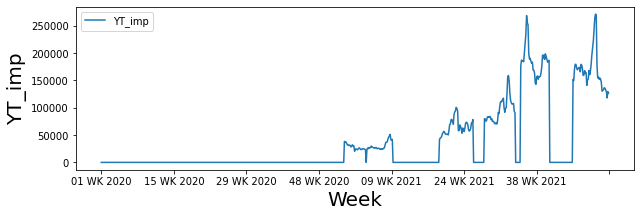

<Figure size 1296x216 with 0 Axes>

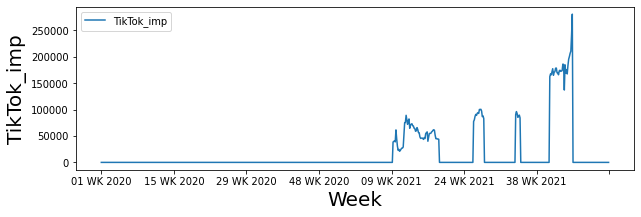

<Figure size 1296x216 with 0 Axes>

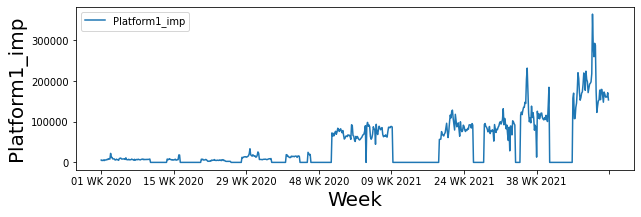

<Figure size 1296x216 with 0 Axes>

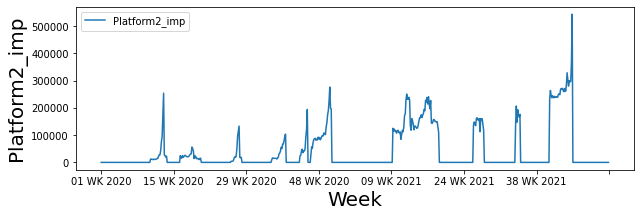

<Figure size 1296x216 with 0 Axes>

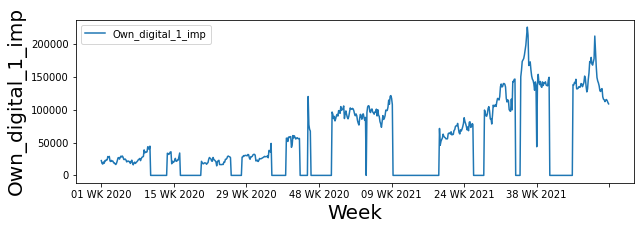

<Figure size 1296x216 with 0 Axes>

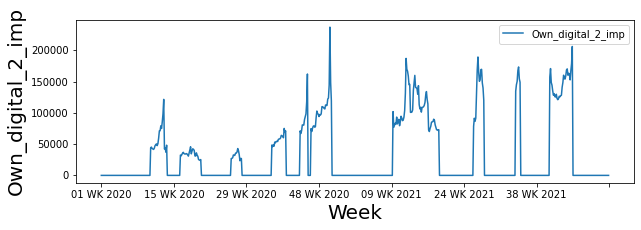

<Figure size 1296x216 with 0 Axes>

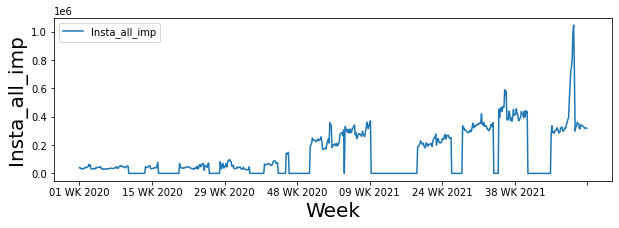

<Figure size 1296x216 with 0 Axes>

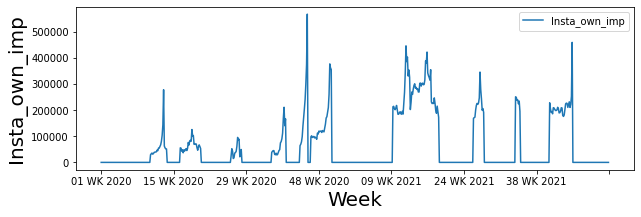

In [ ]:
#Line PLots
for i in df[useful]:
  #f= plt.figure(figsize=(18,3))
  fig, axes = plt.subplots(1,2)
  p = df[[i,"Week2"]].set_index('Week2').plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel(i, fontsize = 20)
  plt.gcf().set_size_inches(10, 3)

In [ ]:
df[useful].describe().T

,count,mean,std,min,25%,50%,75%,max
DAU,700.0,2.654701e+06,1.419001e+06,652388.164968,1.278279e+06,2.611585e+06,3.802836e+06,6.682087e+06
Covid_index,700.0,5.921501e+01,1.831229e+01,0.000000,5.747695e+01,6.303327e+01,7.436339e+01,7.572257e+01
Brand_score,700.0,7.513131e+01,1.344567e+01,29.487051,6.912662e+01,7.757404e+01,8.376517e+01,9.715482e+01
Vouchers_P1,700.0,1.986808e+05,1.633120e+05,0.000000,8.545850e+04,1.469680e+05,2.979170e+05,8.573060e+05
Vouchers_P2,700.0,8.865821e+04,4.074715e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.469580e+06
Meta_video_imp,700.0,1.507641e+04,3.973953e+04,0.000000,0.000000e+00,0.000000e+00,9.921500e+03,2.136240e+05
Meta_nonvideo_imp,700.0,1.239217e+04,3.736578e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.181420e+05
YT_imp,700.0,3.576956e+04,6.206283e+04,0.000000,0.000000e+00,0.000000e+00,5.126250e+04,2.714510e+05
TikTok_imp,700.0,1.593577e+04,4.258964e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.805620e+05
Platform1_imp,700.0,4.218887e+04,5.799845e+04,0.000000,0.000000e+00,7.645500e+03,7.968150e+04,3.645480e+05


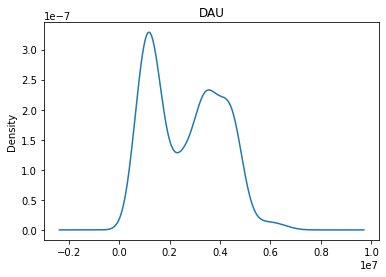

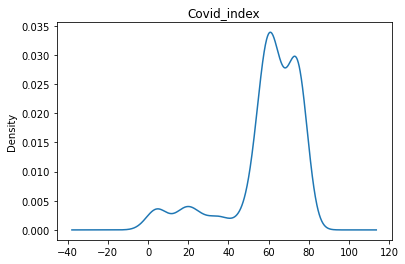

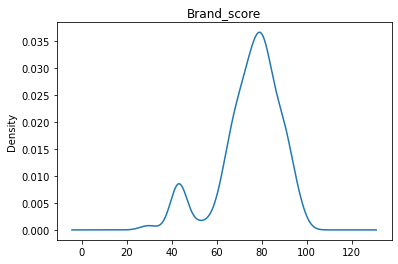

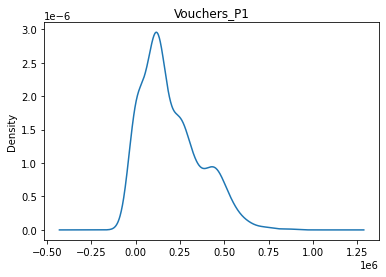

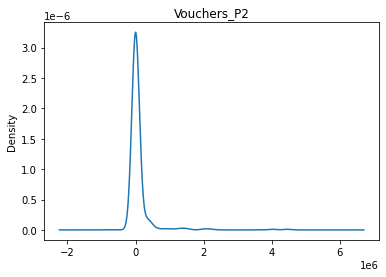

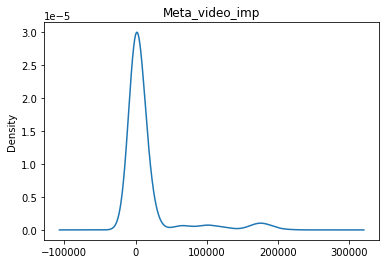

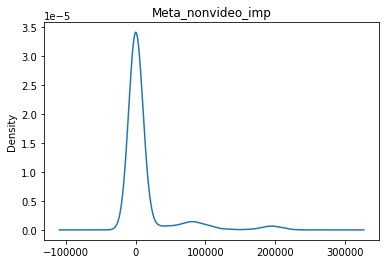

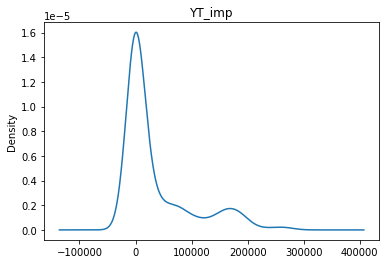

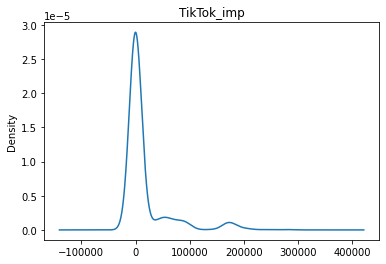

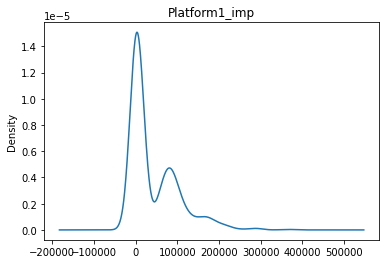

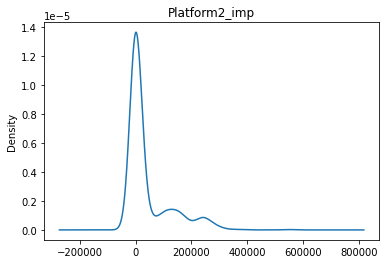

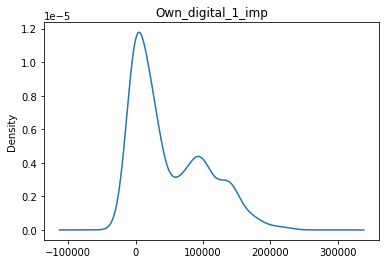

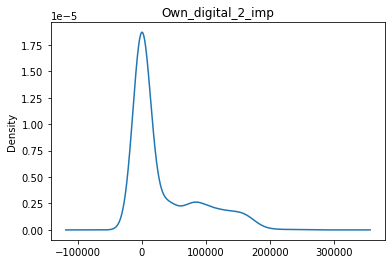

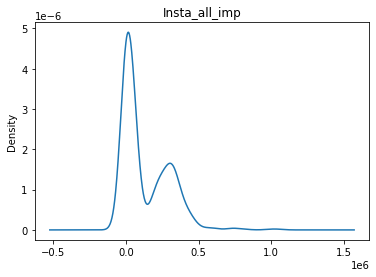

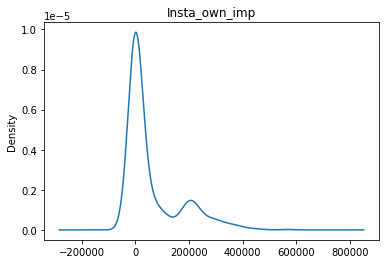

In [ ]:
for i in range(0,len(dfu.columns)):
  dfu[dfu.columns[i]].plot.density()
  plt.title(dfu.columns[i])
  plt.show()
#df.Covid_index.plot.density()


ValueError: ignored

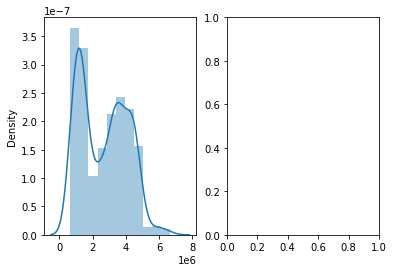

In [ ]:
#Distribution PLots for all
import seaborn as sns
dfu = df[useful]

for i in range(0,len(dfu.columns)-1):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  #plt.subplot(1, 2, 1)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  #dfu[dfu.columns[i]].plot().density()

  #plt.subplot(1, 2, 2)
  #dfu[dfu.columns[i]].plot().density()
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.lineplot(dfu, x=dfu[dfu.columns[i]], ax=axes[1])
  
  # axes[0].set_title(useful[i])
  # axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)
  # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
  # axes[0].plot(x1, y1)
  # axes[1].plot(x2, y2)
  # fig.tight_layout()
  # #f= plt.figure(figsize=(18,3))
  # sns.distplot(dff[i])

Bivariate Analysis

In [ ]:
for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)

In [ ]:
df.head(2)



,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,EndPeriod,DAU,Covid_index,...,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,2020-01-01,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,712379.73444,0.0,...,0,0,0,0,5788,0,22537,0,40497,0
1,2020-01-02,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,715694.90952,0.0,...,0,0,0,0,4492,0,18279,0,41306,0


In [ ]:
df['EndPeriod'] = pd.to_datetime(df['EndPeriod'])

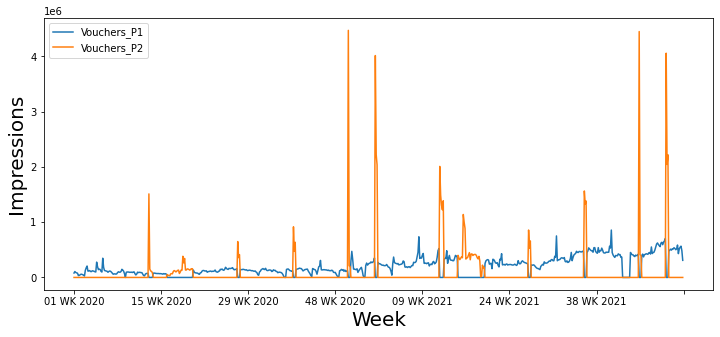

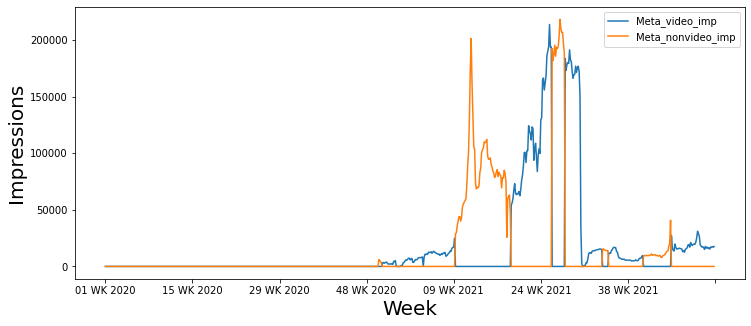

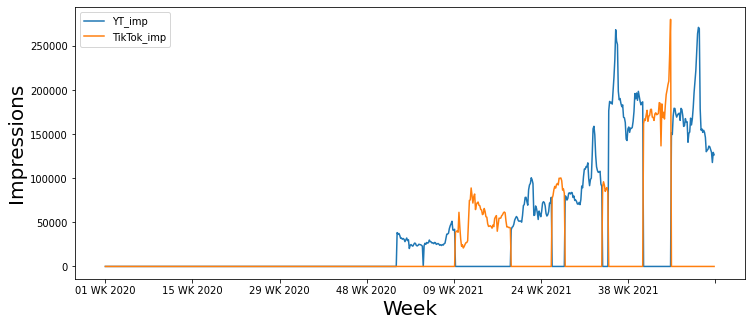

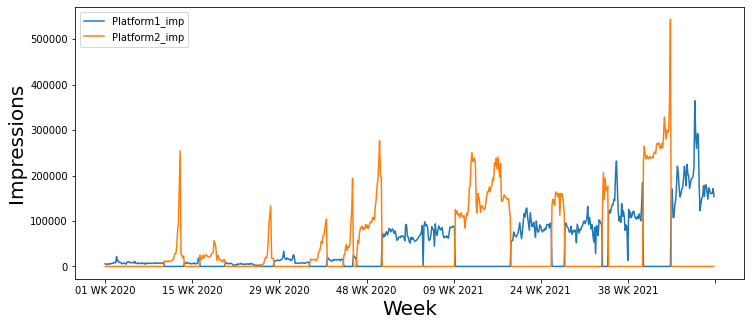

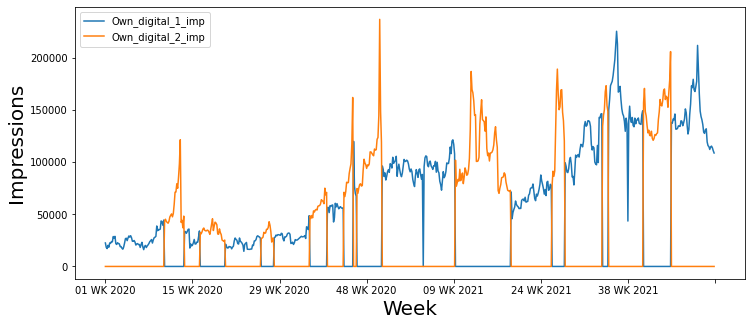

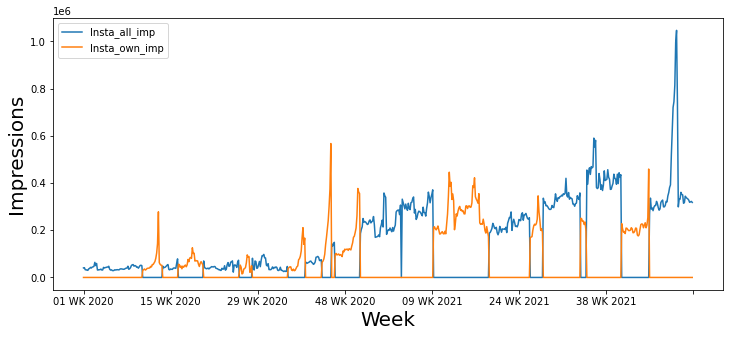

In [ ]:
for i in range(3,len(dfu.columns)-1,2):
#  f= plt.figure(figsize=(18,3))
#   p = dff[i].plot(legend=True);
#   p.set_xlabel("Week", fontsize = 20)
#   p.set_ylabel(i, fontsize = 20)
  

  #f = plt.figure(figsize=(20,10))
  p = df[[useful[i],useful[i+1],'Week2']].set_index('Week2').plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel("Impressions", fontsize = 20);
  plt.gcf().set_size_inches(12, 5)  



In [ ]:
km = ['Vouchers_P1',
 'Vouchers_P2',
 'Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'Platform1_imp',
 'Platform2_imp',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp']

In [ ]:
df.drop(['Execution'],axis=1,inplace=True)

In [ ]:
## Finding #executions
exec_df = pd.DataFrame()
for i in km:
  exec_df[i] = np.where(df[i]!=0,1,0)
a=pd.concat([exec_df,df[['Year']]],axis=1)  

In [ ]:
exec_df.head(2)

,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,1,0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
a.head()

,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,Platform1_imp,Platform2_imp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp,Year
0,1,0,0,0,0,0,1,0,1,0,1,0,2020
1,1,0,0,0,0,0,1,0,1,0,1,0,2020
2,1,0,0,0,0,0,1,0,1,0,1,0,2020
3,1,0,0,0,0,0,1,0,1,0,1,0,2020
4,1,0,0,0,0,0,1,0,1,0,1,0,2020


In [ ]:
df.columns

Index(['Month', 'Month_Year', 'Week', 'Week2', 'month_nr', 'Year', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'Platform1_imp', 'Platform2_imp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp'],
      dtype='object')

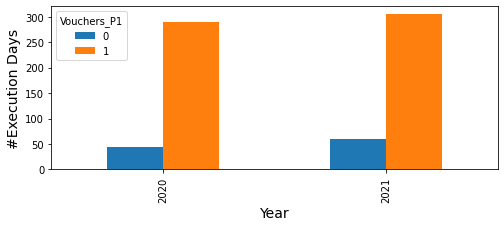

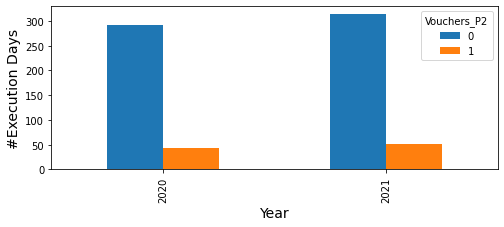

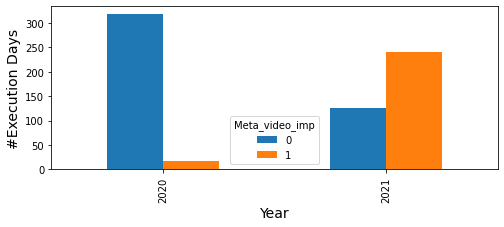

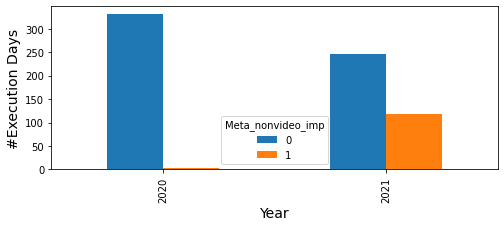

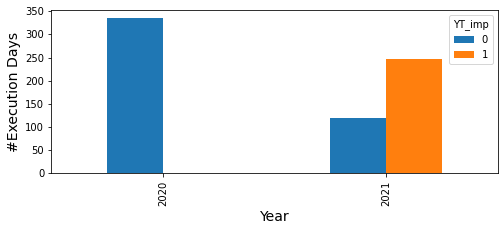

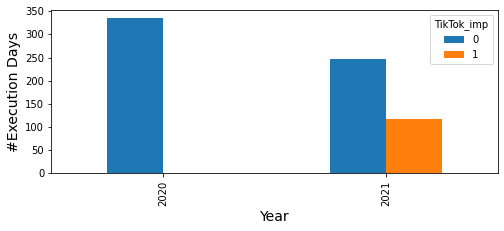

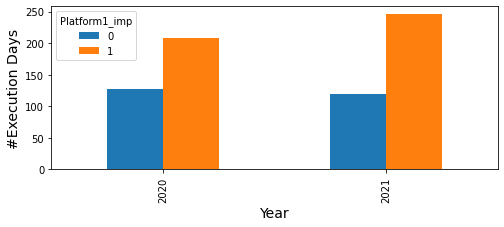

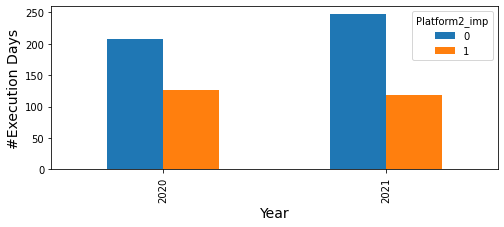

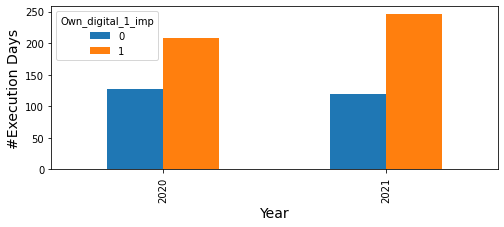

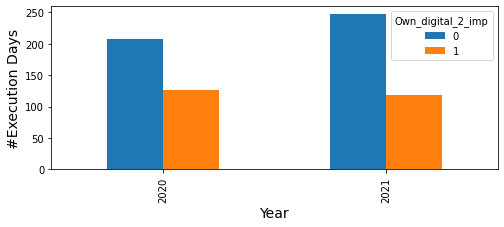

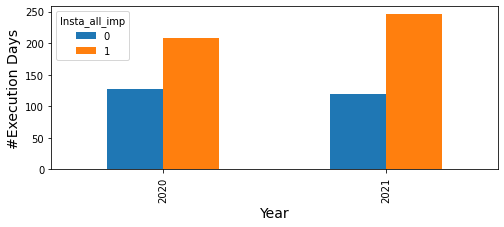

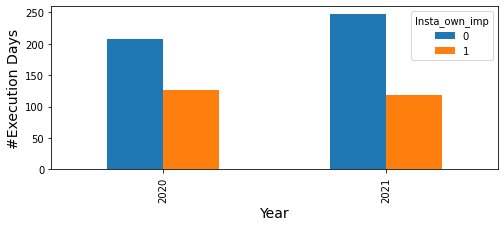

In [ ]:

for i in range(0,len(exec_df.columns)):
  
  #fig, axes = plt.subplots(1,4)#figsize=(10, 3))
  a.groupby(['Year'])[a.columns[i]].value_counts().unstack().plot(kind='bar',stacked = False)
  #a.groupby(['Year'])[a.columns[i+1]].value_counts().unstack().plot(kind='bar',stacked = False)
  plt.xlabel("Year", size=14)
  plt.ylabel("#Execution Days", size=14)
  
  # axes[0].set_title(a.columns[i])
  # axes[1].set_title(a.columns[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(8, 3)
  #plt.annotate(xytext=(0, 5))

  #### Can add a table also showing %execution by year

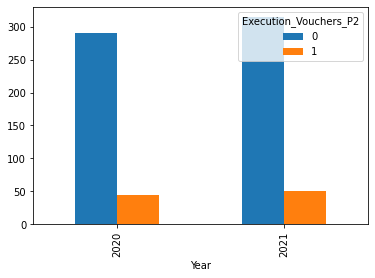

In [ ]:
ax1 = a.groupby(['Year'])['Execution_Vouchers_P2'].value_counts().unstack().plot(kind='bar',stacked = False)
plt.xlabel("Students", size=15)
 
# Setting the y-axis label and its size


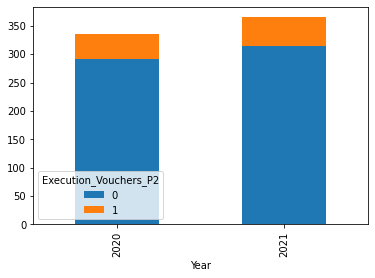

In [ ]:
ax1 = a.groupby(['Year'])['Execution_Vouchers_P2'].value_counts().unstack().plot(kind='bar',stacked = True,align)


In [ ]:
## Done on daily level data
df[['Vouchers_P1',
 'Vouchers_P2',
 'Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'Platform1',
 'Platform2',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp',
 'Year']].groupby('Year').mean().T

Year,2020,2021
Vouchers_P1,98645.359701,290493.710959
Vouchers_P2,42424.531343,131091.789041
Meta_video_imp,145.629851,28779.834247
Meta_nonvideo_imp,55.271642,23714.983562
YT_imp,0.000000,68599.002740
TikTok_imp,0.000000,30561.673973
TV_news_grp,9015.256716,72635.882192
TV_ent_grp,20758.119403,61009.475342
Own_digital_1_imp,21679.534328,75557.460274
Own_digital_2_imp,24070.241791,40164.446575


In [ ]:
df['Year'].unique()

array([2020, 2021])

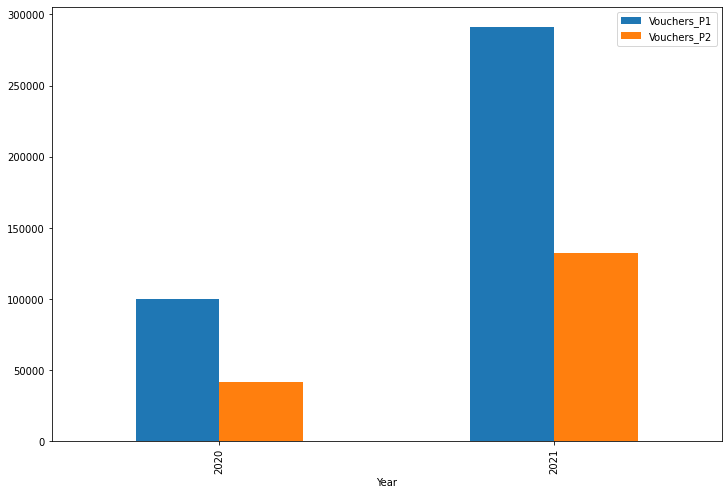

In [ ]:
##Digital Media- Average over years
## Promo vars
df[['Vouchers_P1',
 'Vouchers_P2','Year']].groupby('Year').mean().plot(kind='bar')
plt.gcf().set_size_inches(12, 8)

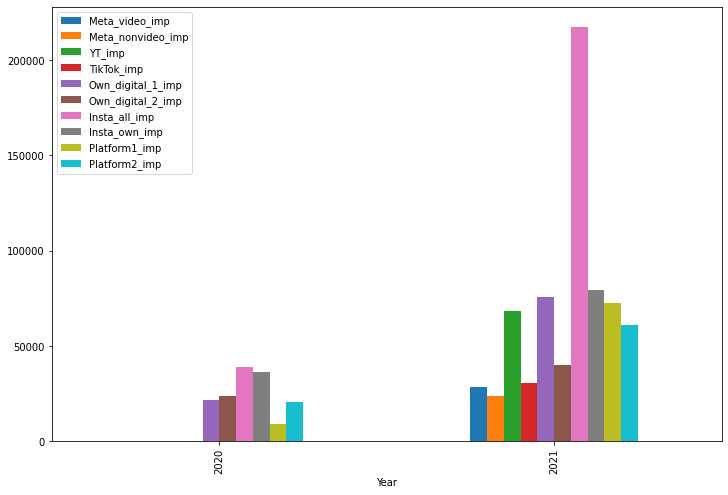

In [ ]:
##Digital media
df[['Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp','Year','Platform1_imp','Platform2_imp'
 ]].groupby('Year').mean().plot(kind='bar')
plt.gcf().set_size_inches(12, 8)

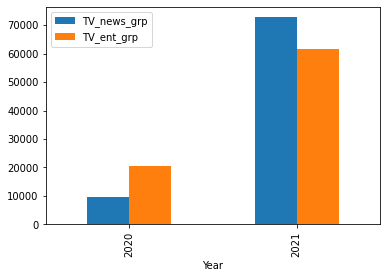

In [ ]:
###Traditional media
df[[ 'Platform1',
 'Platform2','Year']].groupby(by='Year').mean().plot(kind='bar')

In [ ]:

for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)

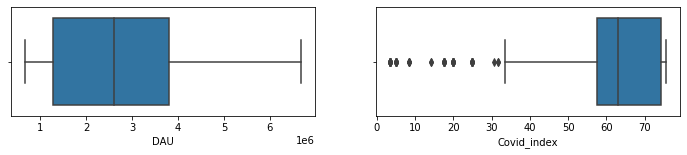

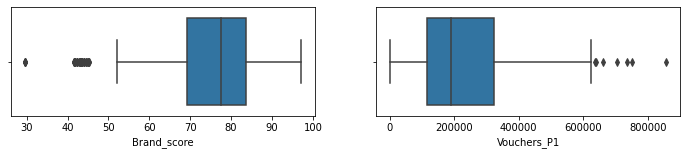

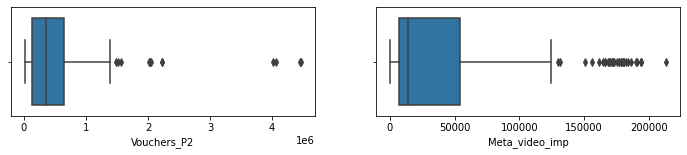

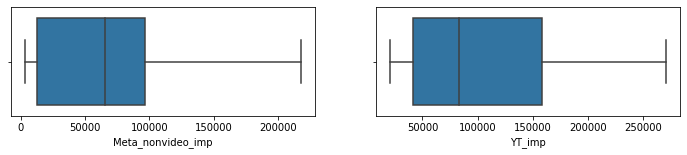

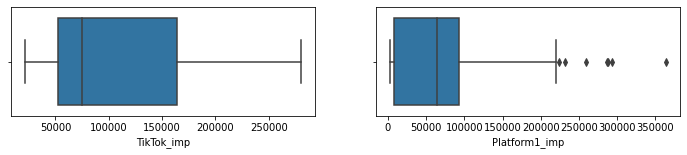

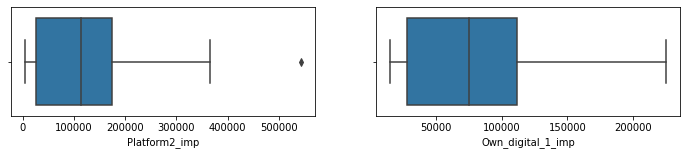

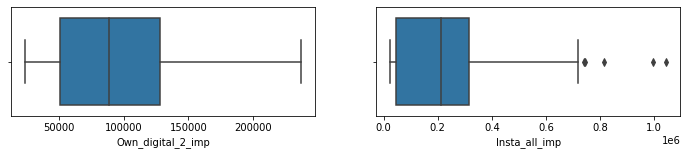

In [ ]:
###Outliers removal

##  Bar plots
import seaborn as sns
for i in range(0,len(useful)-1,2):
    # ignoring zero values for plotting
    fig, axes = plt.subplots(1,2)
    sns.boxplot(x=df[df[useful[i]]!=0][useful[i]],ax=axes[0])
    sns.boxplot(x=df[df[useful[i+1]]!=0][useful[i+1]],ax=axes[1])
    plt.gcf().set_size_inches(12,2)
    #plt.show()

## Some high values can be observed in ... but it is in consonance with the spends data. Hence, can't be labelled as outliers. 

## **FEATURE ENGINEERING**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

dt = pd.read_excel('Sigmoid_transformation_testing.xlsx',sheet_name='Final')
#dt.drop('EndPeriod.1',axis=1,inplace=True)


In [10]:
dt.columns = ['Weeks', 'Week2', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform1',
       'Platform2', 'Own_digital_1', 'Own_digital_2', 'Insta_all', 'Insta_own']

In [11]:
dt.head()

,Weeks,Week2,DAU,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform1,Platform2,Own_digital_1,Own_digital_2,Insta_all,Insta_own
0,2020-01-01,WEEK 01 2020,712379.734440,0.00000,23.825978,80059.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3522.263479,3312.820939,5377.224978,4360.498277,15.686260,2930.152917
1,2020-01-02,WEEK 01 2020,715694.909520,0.00000,23.499162,106968.0,0.0,1524.155726,361.731828,51.612937,1796.73172,3561.577797,3312.820939,5854.913906,4360.498277,17.551259,2930.152917
2,2020-01-03,WEEK 01 2020,670894.701600,3.39251,23.186286,90055.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3603.201369,3312.820939,6309.470909,4360.498277,18.622557,2930.152917
3,2020-01-04,WEEK 01 2020,718422.623484,3.39251,23.152582,82339.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3652.596432,3312.820939,6876.207449,4360.498277,19.517305,2930.152917
4,2020-01-05,WEEK 01 2020,732491.460708,3.39251,23.078546,77517.0,0.0,1524.155726,361.731828,51.612937,1796.73172,3685.945333,3312.820939,7391.226953,4360.498277,20.138046,2930.152917


In [12]:
# dt.columns = ['EndPeriod', 'Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr',
#        'week_nr', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
#        'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
#        'Platform1', 'Own_digital_2', 'Own_digital_1', 'Insta_all', 'Insta_own']
useful2 = ['DAU',
 'Covid_index',
 'Brand_score',
 'Vouchers_P1',
 'Vouchers_P2',
 'Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Platform1',
 'Platform2',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own']


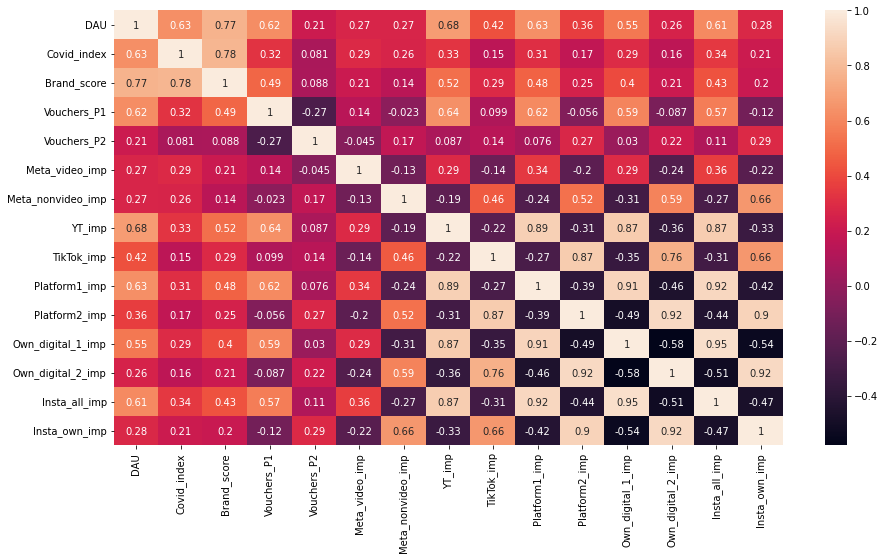

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df[useful].corr(),annot=True)

,DAU,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,TV_news,TV_ent,Own_digital_1,Own_digital_2,Insta_all,Insta_own
DAU,1.000000,0.570386,0.660795,0.623664,0.211119,0.257402,0.229552,0.474127,0.339042,0.474688,0.387257,0.657927,0.362216,0.208607,0.257250
Covid_index,0.570386,1.000000,0.582372,0.273661,0.110037,0.055275,0.217251,0.139955,0.085059,0.124273,0.242024,0.318932,0.258182,0.039325,0.295733
Brand_score,0.660795,0.582372,1.000000,0.423828,0.121007,-0.077251,0.052370,0.421159,0.416676,0.460309,0.305191,0.448054,0.213120,0.170638,0.145419
Vouchers_P1,0.623664,0.273661,0.423828,1.000000,-0.265082,0.125121,-0.157371,0.415876,0.124517,0.531745,-0.052392,0.697993,-0.016641,-0.017509,-0.135527
Vouchers_P2,0.211119,0.110037,0.121007,-0.265082,1.000000,-0.056752,0.136220,0.196808,0.063528,0.092716,0.215361,0.012566,0.226526,0.353663,0.215886
Meta_video,0.257402,0.055275,-0.077251,0.125121,-0.056752,1.000000,0.157311,-0.087428,-0.074346,-0.038168,-0.095210,0.111855,-0.052233,-0.025033,-0.104852
Meta_nonvideo,0.229552,0.217251,0.052370,-0.157371,0.136220,0.157311,1.000000,-0.094183,-0.030140,-0.102062,0.342929,-0.200670,0.440504,-0.028722,0.722724
YT,0.474127,0.139955,0.421159,0.415876,0.196808,-0.087428,-0.094183,1.000000,-0.014990,0.660450,-0.112378,0.537187,-0.139582,0.498494,-0.104961
TikTok,0.339042,0.085059,0.416676,0.124517,0.063528,-0.074346,-0.030140,-0.014990,1.000000,-0.040807,0.647931,-0.058232,0.494928,-0.018250,0.186397
TV_news,0.474688,0.124273,0.460309,0.531745,0.092716,-0.038168,-0.102062,0.660450,-0.040807,1.000000,-0.107653,0.589030,-0.140105,0.401726,-0.122267


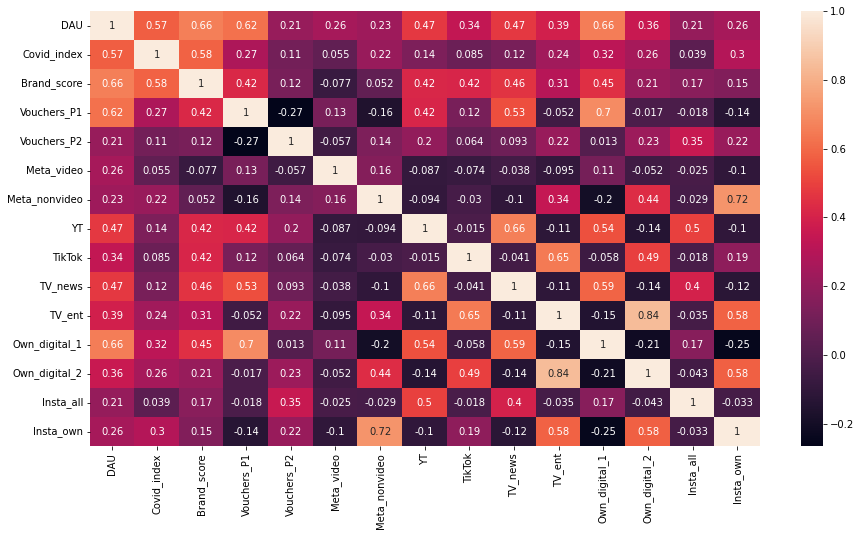

In [ ]:
###Can we show this??? bcoz adsto, sat is done on specific values which are not yet with us
#???
display(dt[useful2].corr())
plt.figure(figsize = (15,8))
sns.heatmap(dt[useful2].corr(),annot=True)

### **Spends**

In [97]:

dm = pd.read_excel('testing.xlsx',sheet_name="Spends_manip")
ds = pd.read_excel('testing.xlsx',sheet_name="Spends")
dm.drop('EndPeriod.1',axis=1,inplace=True)
ds.drop('EndPeriod.1',axis=1,inplace=True)
#ds.head()

In [98]:
dm = dm[['EndPeriod','Year','Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','TV_news','TV_ent'
 ]]
dm.columns = ['Date','Year','Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','Platform1','Platform2']

In [99]:
dm = dm[['Date','Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','Platform1','Platform2','Year'
 ]]

In [18]:
## Spends reduced by 10 times
# dm[['Vouchers_P1','Vouchers_P2','Meta_video',
#  'Meta_nonvideo',
#  'YT',
#  'TikTok',
#  'Own_digital_1',
#  'Own_digital_2',
#  'Insta_all',
#  'Insta_own','Platform1','Platform2','Year'
#  ]] = dm[['Vouchers_P1','Vouchers_P2','Meta_video',
#  'Meta_nonvideo',
#  'YT',
#  'TikTok',
#  'Own_digital_1',
#  'Own_digital_2',
#  'Insta_all',
#  'Insta_own','Platform1','Platform2','Year'
#  ]] /10

# dm[['Vouchers_P1']] =  dm[['Vouchers_P1']]*1.3

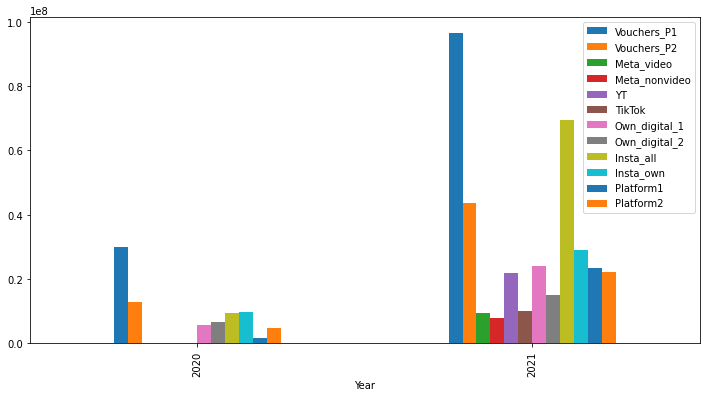

In [28]:
##In spends manip

dm[['Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','Platform1','Platform2','Year'
 ]].groupby('Year').sum().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)

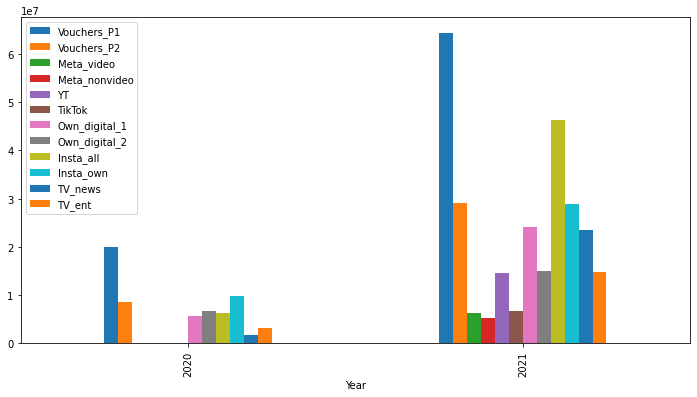

In [ ]:

ds[['Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','Platform1','Platform2','Year'
 ]].groupby('Year').sum().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)


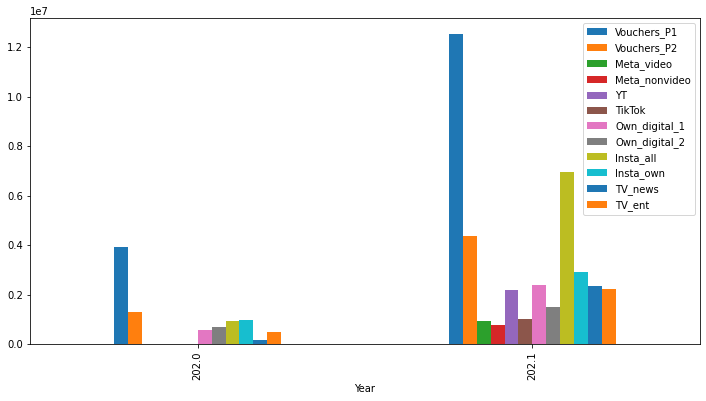

In [ ]:

dm[['Vouchers_P1','Vouchers_P2','Meta_video',
 'Meta_nonvideo',
 'YT',
 'TikTok',
 'Own_digital_1',
 'Own_digital_2',
 'Insta_all',
 'Insta_own','Platform1','Platform2','Year'
 ]].groupby('Year').sum().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)

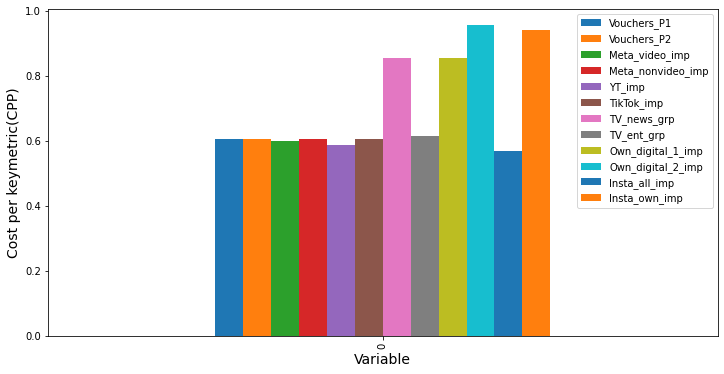

In [ ]:
## CPP  for actual spends

cpp_ratio_act = ds[ds.columns[8:]].sum(axis=0).values/df[df.columns[11:]].sum(axis=0).values
cpp_actual = pd.DataFrame([cpp_ratio_act],columns = df.columns[11:])
cpp_actual.plot(kind='bar')
plt.xlabel("Variable", size=14)
plt.ylabel("Cost per keymetric(CPP)", size=14)
plt.gcf().set_size_inches(12, 6)

##Increase for TV

In [35]:
len(df.columns)

23

In [37]:
df.columns

Index(['Month', 'Month_Year', 'Week', 'Week2', 'month_nr', 'Year', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'Platform1_imp', 'Platform2_imp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp'],
      dtype='object')

In [36]:
len(dm.columns)

14

In [34]:
## CPP  for manip. spends

cpp_ratio_man = dm[dm.columns[8:]].sum(axis=0).values/df[df.columns[11:]].sum(axis=0).values
cpp_man = pd.DataFrame([cpp_ratio_man],columns = df.columns[11:])
cpp_man.plot(kind='bar')
plt.xlabel("Variable", size=14)
plt.ylabel("Cost per keymetric(CPP)", size=14)
plt.gcf().set_size_inches(12, 6)


ValueError: ignored

In [ ]:
dm.head()

,EndPeriod,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,TV_news,TV_ent,Own_digital_1,Own_digital_2,Insta_all,Insta_own
0,2020-01-01,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,202.0,1,1,9474.238452,0.0,0.0,0.0,0.0,0.0,526.9,0.0,2051.6,0.0,3686.55,0.0
1,2020-01-02,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,202.0,1,1,12658.640823,0.0,0.0,0.0,0.0,0.0,408.9,0.0,1664.0,0.0,3760.05,0.0
2,2020-01-03,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,202.0,1,1,10657.198416,0.0,0.0,0.0,0.0,0.0,444.3,0.0,1563.0,0.0,2961.30,0.0
3,2020-01-04,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,202.0,1,1,9744.201731,0.0,0.0,0.0,0.0,0.0,531.8,0.0,1844.4,0.0,2958.75,0.0
4,2020-01-05,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,202.0,1,1,9173.496456,0.0,0.0,0.0,0.0,0.0,396.1,0.0,1681.5,0.0,2800.20,0.0


In [ ]:
dm[dm.columns[8:]].sum(axis=0)

Vouchers_P1      1.645840e+07
Vouchers_P2      5.649469e+06
Meta_video       9.476996e+05
Meta_nonvideo    7.896504e+05
YT               2.202651e+06
TikTok           1.015455e+06
TV_news          2.529820e+06
TV_ent           2.699335e+06
Own_digital_1    2.981121e+06
Own_digital_2    2.174883e+06
Insta_all        7.875957e+06
Insta_own        3.876947e+06
dtype: float64

In [30]:
dm[dm.columns[8:]].sum(axis=0)

Own_digital_2    21748827.0
Insta_all        78759568.5
Insta_own        38769474.0
Platform1        25298195.0
Platform2        26993347.5
Year              1414365.0
dtype: float64

In [ ]:
cpp_man.T

,0
Vouchers_P1,0.118341
Vouchers_P2,0.091031
Meta_video_imp,0.089800
Meta_nonvideo_imp,0.091031
YT_imp,0.087970
TikTok_imp,0.091031
TV_news_grp,0.085663
TV_ent_grp,0.092372
Own_digital_1_imp,0.085563
Own_digital_2_imp,0.095710


In [ ]:
## Adstocking and Sigmoid Transformation
# dt.columns = ['EndPeriod', 'Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr',
#        'week_nr', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
#        'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
#        'Platform1', 'Own_digital_2', 'Own_digital_1', 'Insta_all', 'Insta_own']

**Modelling**

---



In [ ]:
# dt['Brand_score'] = dt["Brand_score"]+.000003*dt['DAU']
# dt["DAU"] = dt["DAU"]*.94567 
# dt['Insta_own'] = dt['Insta_own']+ dt["DAU"]*.1

In [ ]:
dt.columns

Index(['Weeks', 'Week2', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'TV_news',
       'TV_ent', 'Own_digital_1', 'Own_digital_2', 'Insta_all', 'Insta_own'],
      dtype='object')

In [100]:
xf = dt[['Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok',
       'Platform2', 'Own_digital_1', 'Own_digital_2', 'Insta_own']]  #,, 'Platform1', 'Insta_all'
yf = dt[['DAU']]



In [ ]:
# xf = dt.drop(['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
#        'EndPeriod',"Week",'DAU',"GRI_extfactor","PERMKT_E2_type6_E3_bau_net_hlflfe15_satpnt0.7_stpness1",
#        "PERMKT_E2_type4_E3_mega_net_hlflfe3_satpnt0.7_stpness0.75","PERMKT_E2_type4_E3_bau_net_hlflfe12_satpnt0.5_stpness1.25","PERMKT_E2_type7_E3_mega_net_hlflfe12_satpnt0.6_stpness1.25"],axis=1)  #,"PERMKT_E2_type7_E3_mega_net_hlflfe12_satpnt0.6_stpness1.25"

# xf = dt.drop(['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
#        'EndPeriod',"Week",'DAU',
#        "Own_digital_1","Own_digital_2","Insta_own"],axis=1)  #,"PERMKT_E2_type7_E3_mega_net_hlflfe12_satpnt0.6_stpness1.25","Covid_index","Platform1"
# yf = dt[['DAU']]

In [101]:
xff = pd.concat([xf,dec2[['AHS','ALS']]],axis=1)

In [71]:
xff.head()

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform2,Own_digital_1,Own_digital_2,Insta_own,AHS,ALS
0,1.0,0.00000,23.825978,80059.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3312.820939,5377.224978,4360.498277,2930.152917,0,0
1,1.0,0.00000,23.499162,106968.0,0.0,1524.155726,361.731828,51.612937,1796.73172,3312.820939,5854.913906,4360.498277,2930.152917,0,0
2,1.0,3.39251,23.186286,90055.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3312.820939,6309.470909,4360.498277,2930.152917,0,0
3,1.0,3.39251,23.152582,82339.5,0.0,1524.155726,361.731828,51.612937,1796.73172,3312.820939,6876.207449,4360.498277,2930.152917,0,0
4,1.0,3.39251,23.078546,77517.0,0.0,1524.155726,361.731828,51.612937,1796.73172,3312.820939,7391.226953,4360.498277,2930.152917,0,0


In [102]:
xf.shape,yf.shape

((700, 12), (700, 1))

In [122]:
xf = sm.add_constant(xf)
modelf = sm.OLS(yf,xf)


In [103]:
xff = sm.add_constant(xff)
modelff = sm.OLS(yf,xff)
resultsff = modelff.fit()
resultsff.params
print(resultsff.summary())

                            OLS Regression Results                            
Dep. Variable:                    DAU   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1266.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:33:26   Log-Likelihood:                -9756.7
No. Observations:                 700   AIC:                         1.954e+04
Df Residuals:                     685   BIC:                         1.961e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.641e+05   5.44e+04      3.018

In [123]:
xf = sm.add_constant(xf)
modelf = sm.OLS(yf,xf)

In [124]:
resultsf = modelf.fit()
resultsf.params

const            83067.261403
Covid_index      13020.645184
Brand_score       9010.621457
Vouchers_P1          1.937774
Vouchers_P2          0.424260
Meta_video           0.500277
Meta_nonvideo        0.370548
YT                   1.417107
TikTok               0.368045
Platform2            0.406076
Own_digital_1        0.589046
Own_digital_2        1.157778
Insta_own            0.105090
dtype: float64

In [125]:
print(resultsf.summary())

                            OLS Regression Results                            
Dep. Variable:                    DAU   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     495.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:09:24   Log-Likelihood:                -10115.
No. Observations:                 700   AIC:                         2.026e+04
Df Residuals:                     687   BIC:                         2.032e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.307e+04   9.04e+04      0.919

In [43]:
#Decomps

dec = pd.DataFrame()
for i in range(len(xf.columns)):
  dec[xf.columns[i]] = xf[xf.columns[i]] * resultsf.params.values[i]

dec.head(10)

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform2,Own_digital_1,Own_digital_2,Insta_own
0,83067.261403,0.000000,214686.872041,155137.221177,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3167.433910,5048.489205,307.931093
1,83067.261403,0.000000,211742.049862,207279.814074,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3448.814756,5048.489205,307.931093
2,83067.261403,44172.671075,208922.846070,174507.210534,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3716.569828,5048.489205,307.931093
3,83067.261403,44172.671075,208619.154785,159555.346000,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4050.403831,5048.489205,307.931093
4,83067.261403,44172.671075,207952.044038,150210.430667,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4353.774110,5048.489205,307.931093
5,83067.261403,44172.671075,316090.179777,65928.886342,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4757.661080,5048.489205,307.931093
6,83067.261403,44172.671075,314592.856813,71027.169855,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,5166.021614,5048.489205,307.931093
7,83067.261403,44172.671075,313797.559353,93920.032426,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,5626.076840,5048.489205,307.931093
8,83067.261403,44172.671075,312455.386985,113490.581396,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,6090.102859,5048.489205,307.931093
9,83067.261403,44172.671075,312206.547039,108761.443839,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,6732.212435,5048.489205,307.931093


In [104]:
#Decomps with AHS, ALS

decf = pd.DataFrame()
for i in range(len(xff.columns)):
  decf[xff.columns[i]] = xff[xff.columns[i]] * resultsff.params.values[i]

decf.head(10)

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform2,Own_digital_1,Own_digital_2,Insta_own,AHS,ALS
0,164148.344936,0.000000,207754.603168,142258.659758,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3532.315893,6380.032674,365.103269,-0.0,0.0
1,164148.344936,0.000000,204904.869706,190072.687401,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3846.111243,6380.032674,365.103269,-0.0,0.0
2,164148.344936,32478.925003,202176.698395,160020.668801,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4144.711159,6380.032674,365.103269,-0.0,0.0
3,164148.344936,32478.925003,201882.813344,146310.018363,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4517.002163,6380.032674,365.103269,-0.0,0.0
4,164148.344936,32478.925003,201237.243696,137740.861840,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4855.320085,6380.032674,365.103269,-0.0,0.0
5,164148.344936,32478.925003,305883.584034,60455.865712,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,5305.734017,6380.032674,365.103269,-0.0,0.0
6,164148.344936,32478.925003,304434.609837,65130.920313,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,5761.136859,6380.032674,365.103269,-0.0,0.0
7,164148.344936,32478.925003,303664.992641,86123.354769,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,6274.189517,6380.032674,365.103269,-0.0,0.0
8,164148.344936,32478.925003,302366.159205,104069.274170,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,6791.670396,6380.032674,365.103269,-0.0,0.0
9,164148.344936,32478.925003,302125.354336,99732.721242,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,7507.749697,6380.032674,365.103269,-0.0,0.0


In [44]:
##Model stats

resid = yf['DAU'] - dec.sum(axis=1)

def mape (actual, pred): 
  actual, pred = np.array (actual), np.array (pred) 
  return np.mean (np.abs ((actual - pred) / actual)) * 100
print("MAPE: ",round(mape(yf['DAU'],dec.sum(axis=1)),2),'%')

## ATL + BTL 
media = sum(dec.iloc[:,3:].sum(axis=0))
base = np.sum(dec[['const','Brand_score','Covid_index']].sum(axis=0))+sum(resid)

##Contribution
print('Incr. contribution: ',media/sum(dec.sum(axis=0))*100,'%')
print('Base contribution: ',base/sum(dec.sum(axis=0))*100,'%')

MAPE:  15.39 %
Incr. contribution:  49.39369693141794 %
Base contribution:  50.606303068684355 %


In [85]:
cols = [i for i in decf.columns].append('Residual')

In [91]:
decf.columns

Index(['const', 'Covid_index', 'Brand_score', 'Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own', 'AHS', 'ALS'],
      dtype='object')

In [105]:
##Model stats with AHS, ALS

residf = yf['DAU'] - decf.sum(axis=1)
decf = pd.concat([decf,residf],axis=1)
decf.columns = ['const', 'Covid_index', 'Brand_score', 'Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own', 'AHS', 'ALS','Residual']

def mape (actual, pred): 
  actual, pred = np.array (actual), np.array (pred) 
  return np.mean (np.abs ((actual - pred) / actual)) * 100
print("MAPE: ",round(mape(yf['DAU'],decf[decf.columns[:-1]].sum(axis=1)),2),'%')

## ATL + BTL 
mediaf = sum(decf.iloc[:,3:-3].sum(axis=0))
basef = np.sum(decf[['const','Brand_score','Covid_index','AHS','ALS','Residual']].sum(axis=0))




MAPE:  10.09 %
Incr. contribution:  54.170513953674615 %
Base contribution:  49.23411384003686 %


In [117]:
##Contribution
print('Incr. contribution: ',mediaf/sum(decf.sum(axis=0))*100,'%')
print('Base contribution: ',basef/sum(decf.sum(axis=0))*100,'%')

Incr. contribution:  50.765886159963145 %
Base contribution:  49.23411384003686 %


In [135]:
dec.columns

Index(['const', 'Covid_index', 'Brand_score', 'Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own'],
      dtype='object')

In [46]:
dec2 = pd.concat([dec,resid],axis=1)

In [48]:
dec2.columns = ['const', 'Covid_index', 'Brand_score', 'Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own',"Residual"]

In [52]:
dec2['ALS'] = np.where(dec2['Residual']>1.3*np.std(dec2.Residual),1,0)
dec2['AHS'] = np.where(dec2['Residual']<-1.3*np.std(dec2.Residual),1,0)

In [69]:
#dec2.loc[np.where(dec2['AHS']==1)[0],dec2.columns]

In [ ]:
base_vector = dec[['const','Brand_score','Covid_index']].sum(axis=1) + resid
np.median(base_vector)

1229456.4144985373

In [136]:
print('Brand contribution: ',np.sum(dec['Brand_score'])/sum(dec.sum(axis=0))*100,'%')
print('Covid-index contribution: ',np.sum(dec['Covid_index'])/sum(dec.sum(axis=0))*100,'%')
print('residue',(np.sum(resid)/sum(dec.sum(axis=0)))*100,'%')
print('CONSTANT',(np.sum(dec['const'])/sum(dec.sum(axis=0)))*100,'%')

Brand contribution:  20.381769252708192 %
Covid-index contribution:  27.095471390663732 %
residue 1.0229753666516838e-10 %
CONSTANT 3.129062425210126 %


In [140]:
contri_pie = pd.DataFrame({'Base':[49.23],"Incremental":[50.76]})


([<matplotlib.patches.Wedge at 0x7fe937d98b10>,
 [Text(-1.0996822752830457, 0.02643659260009598, 'Base'),
  Text(1.0996822728078686, -0.026436695559781183, 'Incremental')])

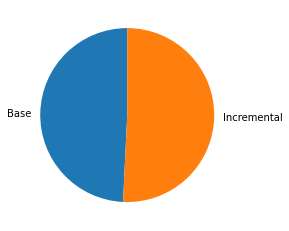

In [143]:
plt.pie(contri_pie,labels=['Base','Incremental'],startangle = 90)

In [144]:
decf.head()

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,Platform2,Own_digital_1,Own_digital_2,Insta_own,AHS,ALS,Residual
0,164148.344936,0.000000,207754.603168,142258.659758,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3532.315893,6380.032674,365.103269,-0.0,0.0,185432.634322
1,164148.344936,0.000000,204904.869706,190072.687401,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,3846.111243,6380.032674,365.103269,-0.0,0.0,143469.719871
2,164148.344936,32478.925003,202176.698395,160020.668801,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4144.711159,6380.032674,365.103269,-0.0,0.0,98672.176944
3,164148.344936,32478.925003,201882.813344,146310.018363,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4517.002163,6380.032674,365.103269,-0.0,0.0,159832.343312
4,164148.344936,32478.925003,201237.243696,137740.861840,0.0,758.014243,158.532893,67.931546,759.63582,763.925917,4855.320085,6380.032674,365.103269,-0.0,0.0,182777.588786


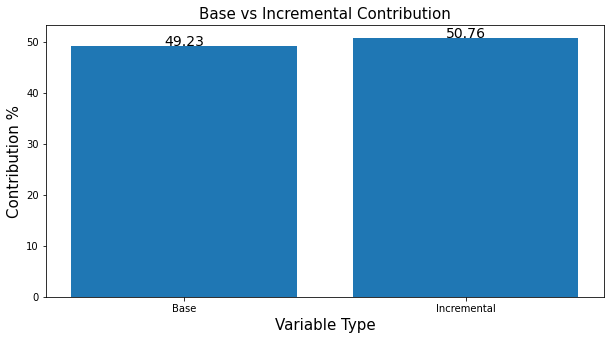

In [217]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=14)

x=['Base','Incremental']
y=[49.23,50.76]
plt.figure(figsize = (10, 5))
plt.bar(x,y)
addlabels(x, y)
      
# giving title to the plot
plt.title("Base vs Incremental Contribution",size=15)
  
# giving X and Y labels
plt.xlabel("Variable Type",size=15)
plt.ylabel("Contribution %",size=15)
  
# visualizing the plot
plt.show()

In [ ]:
x2=[]
y2 = []

In [119]:
## with ALS, AHS

print('Brand contribution: ',np.sum(decf['Brand_score'])/sum(decf.sum(axis=0))*100,'%')
print('Covid-index contribution: ',np.sum(decf['Covid_index'])/sum(decf.sum(axis=0))*100,'%')
print('residue',(np.sum(decf['Residual'])/sum(decf.sum(axis=0)))*100,'%')
print('CONSTANT',(np.sum(decf['const'])/sum(decf.sum(axis=0)))*100,'%')
print('AHS',(np.sum(decf['AHS'])/sum(decf.sum(axis=0)))*100,'%')
print('ALS',(np.sum(decf['ALS'])/sum(decf.sum(axis=0)))*100,'%')

Brand contribution:  19.72363909680766 %
Covid-index contribution:  19.92253947534394 %
residue -5.176891803049574e-11 %
CONSTANT 6.183307474225568 %
AHS -1.0775664075876674 %
ALS 4.482194201299132 %


In [169]:
decf.columns[:-1]

Index(['const', 'Covid_index', 'Brand_score', 'Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own', 'AHS', 'ALS'],
      dtype='object')

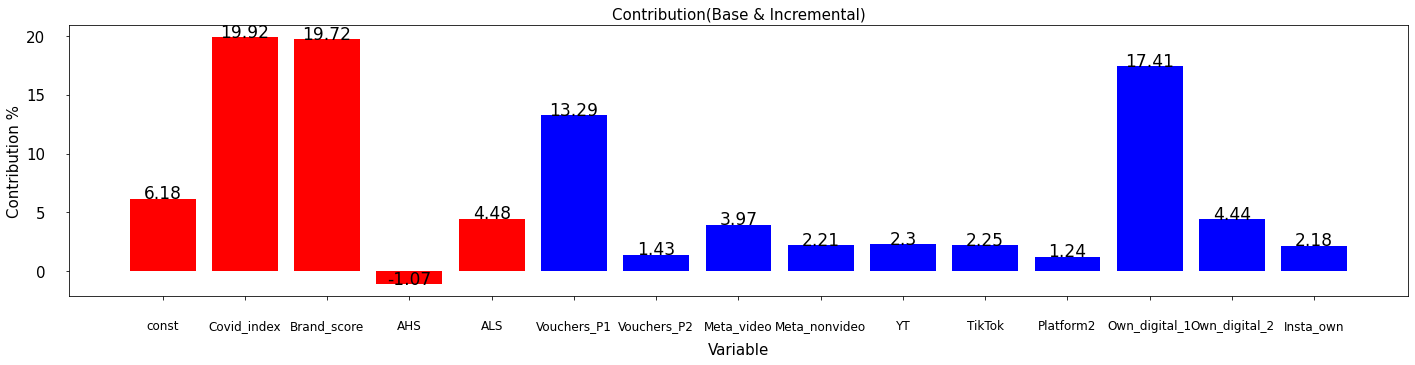

In [292]:
## Contribution 
x2=['const', 'Covid_index', 'Brand_score', 'AHS', 'ALS','Vouchers_P1', 'Vouchers_P2',
       'Meta_video', 'Meta_nonvideo', 'YT', 'TikTok', 'Platform2',
       'Own_digital_1', 'Own_digital_2', 'Insta_own']
y2 = [6.18,19.92,19.72,-1.07,4.48,13.29,1.43,3.97,2.21,2.3,2.25,1.24,17.41,4.44,2.18]
def addlabels2(x2,y2):
    for i in range(len(x2)):
      #if x2[i] in ['const', 'Covid_index', 'Brand_score','AHS','LHS']:
        plt.text(i, y2[i], y2[i], ha = 'center',size=17)
      # else:
      #   plt.text(i, y2[i], y2[i], ha = 'center',size=14,color='blue')


      
plt.figure(figsize = (24, 5))
plt.bar(x2[0:5],y2[0:5],color='red')
plt.bar(x2[5:],y2[5:],color='blue')

addlabels2(x2,y2)  
#addlabels2(x2[5:],y2[5:])  
      
# giving title to the plot
plt.title("Contribution(Base & Incremental)",size=15)
  
# giving X and Y labels
plt.xlabel("Variable",size=15,labelpad=10)
plt.ylabel("Contribution %",size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.tick_params(axis='both', which='major', pad=20)
  
# visualizing the plot
plt.show()

Text(0.5, 1.0, 'Promo vs Media contribution in Incremental')

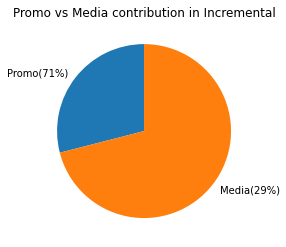

In [199]:
##ATL vs BTL contri

plt.pie([29,71],labels=['Promo(71%)','Media(29%)'],startangle = 90)
plt.title('Promo vs Media contribution in Incremental')

In [127]:
contribution2 = np.sum(decf[['Insta_own']])/sum(decf.sum(axis=0))*100

In [129]:
np.sum(decf[['Insta_own']])/sum(decf.sum(axis=0))*100

Insta_own    2.189166
dtype: float64

In [134]:
np.sum(decf[['const']])/sum(decf.sum(axis=0))*100

const    6.183307
dtype: float64

In [200]:
model_vars = [col for col in ds.columns if col in xff.columns]
#spends_list = np.sum(ds[model_vars],axis=0)   for actual
spends_list = np.sum(dm[model_vars],axis=0)
decomps = []

for i in range(len(xff.columns)):
  contribution = np.sum(decf[xff.columns[i]])/sum(decf.sum(axis=0))*100
  print(xff.columns[i],' contribution: ',contribution,'%')
  if xff.columns[i] in model_vars:
    decomps.append(np.sum(decf[xff.columns[i]]))

const  contribution:  6.183307474225568 %
Covid_index  contribution:  19.92253947534394 %
Brand_score  contribution:  19.72363909680766 %
Vouchers_P1  contribution:  13.29858931905385 %
Vouchers_P2  contribution:  1.4336518004063832 %
Meta_video  contribution:  3.971221173829398 %
Meta_nonvideo  contribution:  2.2160300723149597 %
YT  contribution:  2.305311930324572 %
TikTok  contribution:  2.2569798579143234 %
Platform2  contribution:  1.240193938895108 %
Own_digital_1  contribution:  17.410901950057596 %
Own_digital_2  contribution:  4.443840434697952 %
Insta_own  contribution:  2.1891656824690098 %
AHS  contribution:  -1.0775664075876674 %
ALS  contribution:  4.482194201299132 %


In [201]:
#manip
roi = pd.DataFrame({'Decomps':decomps,'Spends':spends_list})
#roi['Spends'] = spends_list
roi['RoI'] = roi['Decomps']/roi['Spends']

In [213]:
roi
roi = roi.round(3)

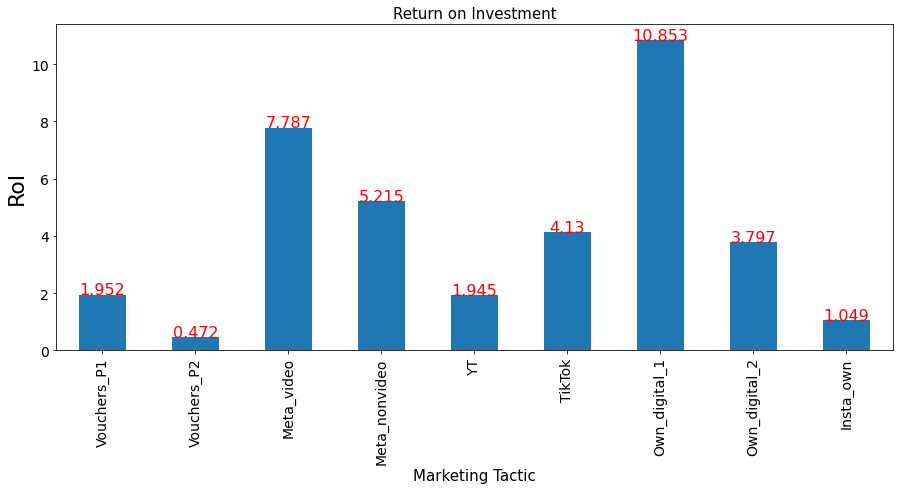

In [285]:
#roi[['RoI']].plot(kind='bar')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=16,color='red')
abc = [i for i in roi.index]      
plt.figure(figsize = (15, 6))
# plt.bar(x2[0:5],y2[0:5],color='red')
# plt.bar(x2[5:],y2[5:],color='blue')

addlabels(abc,roi['RoI'])  
#addlabels2(x2[5:],y2[5:])  
      
# giving title to the plot
roi['RoI'].plot(kind='bar')
plt.title("Return on Investment",size=15)
  
# giving X and Y labels
plt.xlabel("Marketing Tactic",size=15)
plt.ylabel("RoI",size=22)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
  
# visualizing the plot
plt.show()

**RESPONSE CURVE**

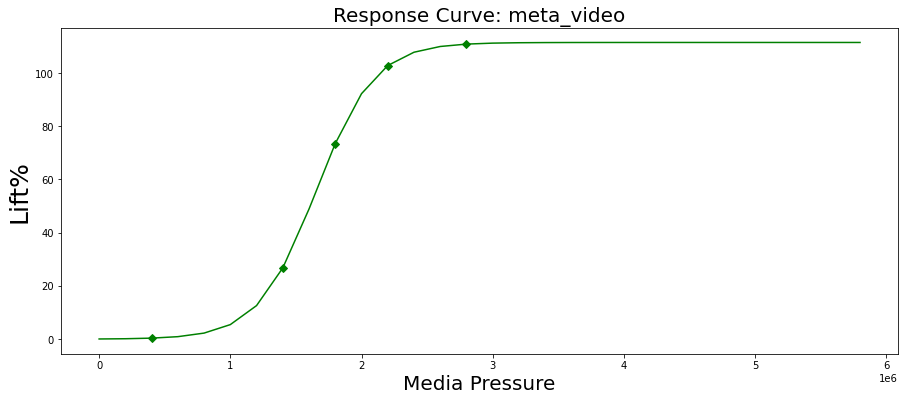

In [271]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_meta')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [2, 7, 9, 11, 14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: meta_video",size=20)
  
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

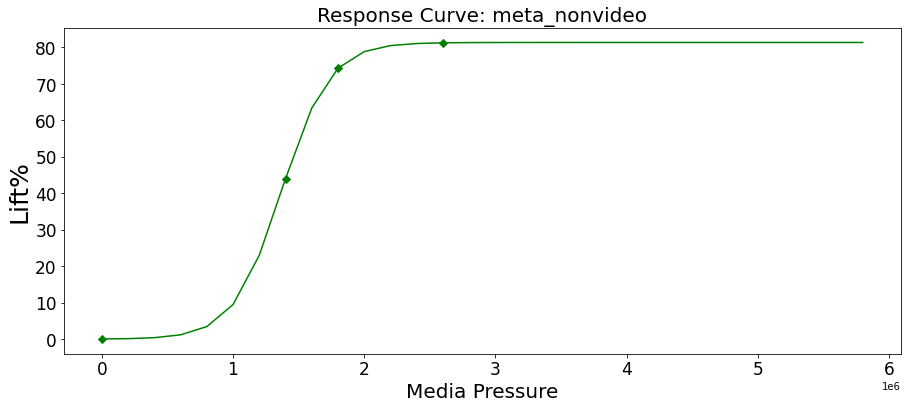

In [282]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_META_nonvideo')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [0, 7, 9, 13]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
      
# giving title to the plot
plt.title("Response Curve: meta_nonvideo",size=20)
  
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

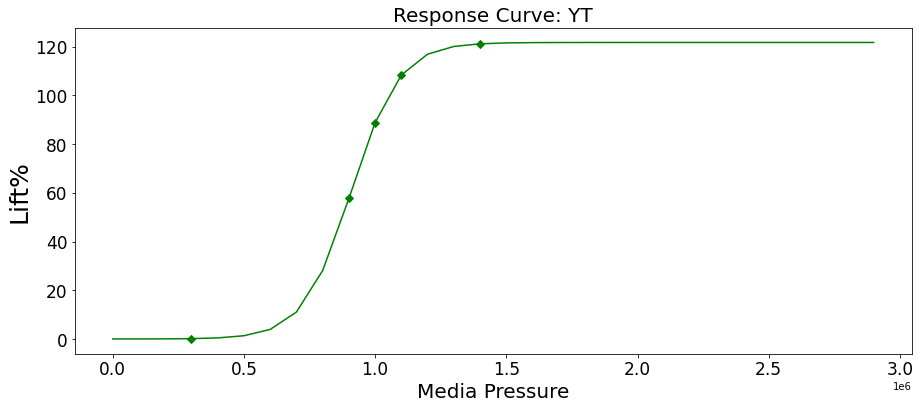

In [281]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_YT')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: YT",size=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

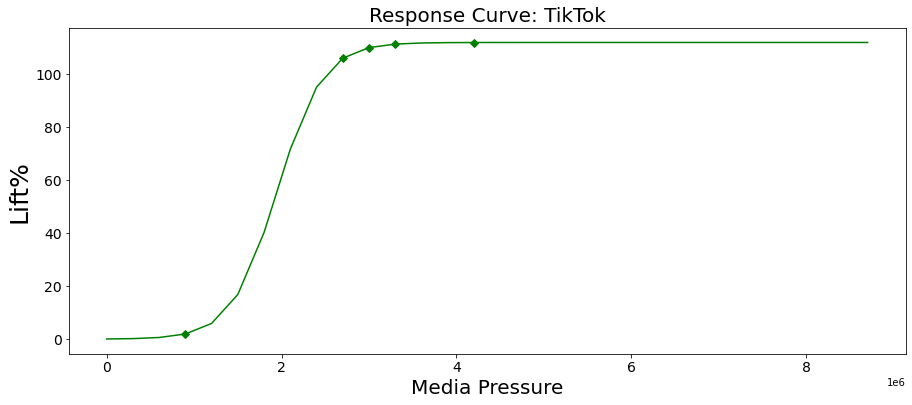

In [296]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_TikTok')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: TikTok",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

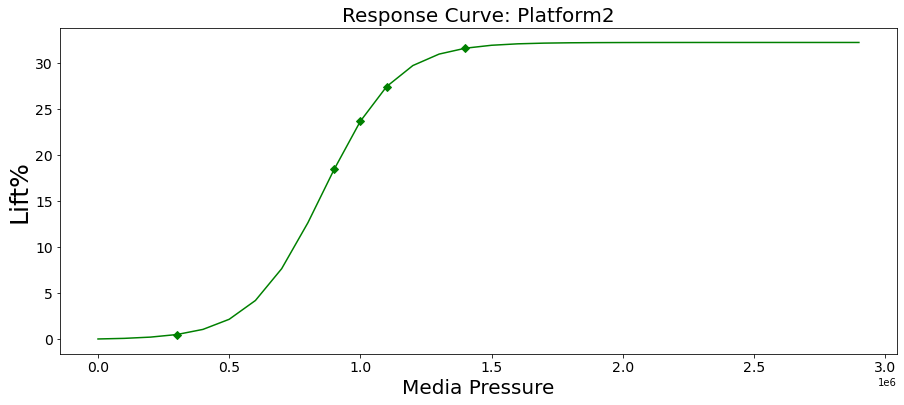

In [297]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_Platform2')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Platform2",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

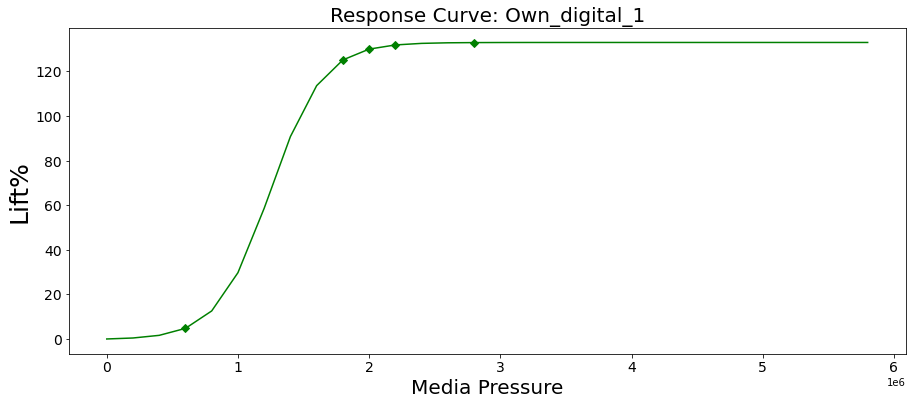

In [298]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_OD_1')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Own_digital_1",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

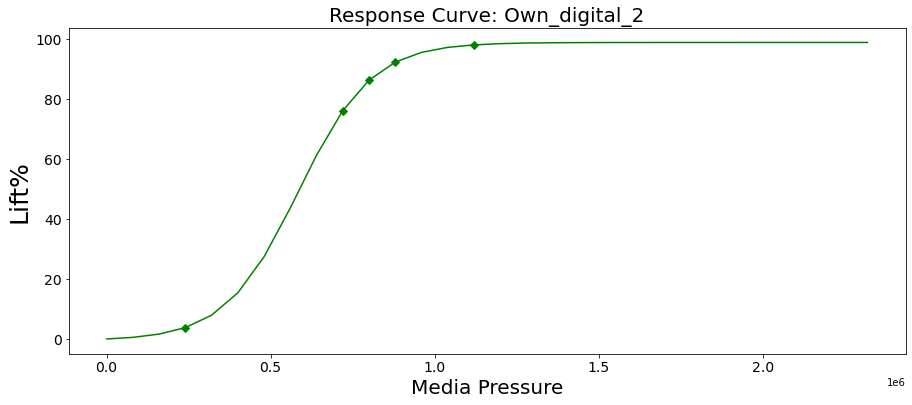

In [299]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_OD_2')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Own_digital_2",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

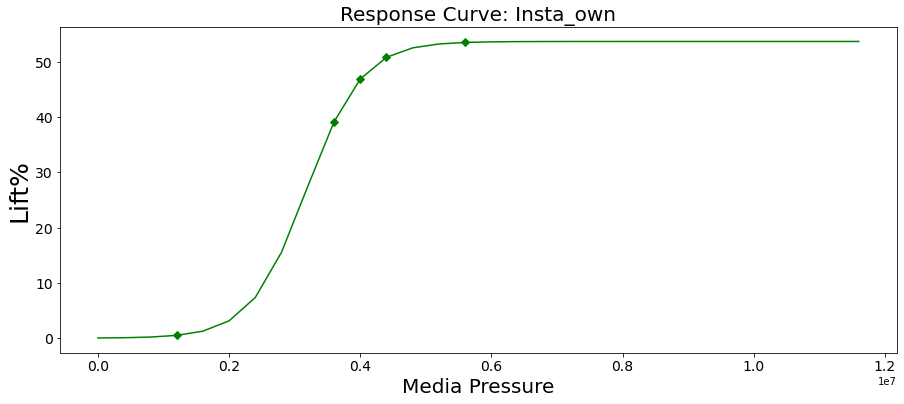

In [300]:
rc1 = pd.read_excel('Sigmoid_transformation_testing_RC.xlsx',sheet_name='RC_Insta_own')
rc1 = rc1.iloc[:30,:]
plt.figure(figsize = (15, 6))
#plt.plot(rc1['Media Pressure'],rc1['Lift'])

markers_on = [3, 9, 10, 11,14]  # one less as starting from 0
#
#fig,ax = plt.subplots(1)
plt.plot(rc1['Media Pressure'],rc1['Lift'],'-gD', markevery=markers_on, label='line with select markers')
#plt.title("Response Curve: Meta_video",size=15)
  
      
# giving title to the plot
plt.title("Response Curve: Insta_own",size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# giving X and Y labels
plt.xlabel("Media Pressure",size=20)
plt.ylabel("Lift%",size=25)
  
# visualizing the plot
plt.show()

In [ ]:
dec.head()

,const,Covid_index,Brand_score,Vouchers_P1,Vouchers_P2,Meta_video,Meta_nonvideo,YT,TikTok,TV_ent,Own_digital_1,Own_digital_2,Insta_own
0,83067.261403,0.000000,214686.872041,155137.221177,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3167.433910,5048.489205,307.931093
1,83067.261403,0.000000,211742.049862,207279.814074,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3448.814756,5048.489205,307.931093
2,83067.261403,44172.671075,208922.846070,174507.210534,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,3716.569828,5048.489205,307.931093
3,83067.261403,44172.671075,208619.154785,159555.346000,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4050.403831,5048.489205,307.931093
4,83067.261403,44172.671075,207952.044038,150210.430667,0.0,762.500476,134.039071,73.141078,661.277589,1345.258122,4353.774110,5048.489205,307.931093


In [ ]:
roi.index

Index(['Vouchers_P1', 'Vouchers_P2', 'Meta_video', 'Meta_nonvideo', 'YT',
       'TikTok', 'TV_ent', 'Own_digital_1', 'Own_digital_2', 'Insta_own'],
      dtype='object')

In [ ]:
roi.loc['Vouchers_P1','Decomps']

269498638.22947526

In [ ]:
for i in dec.columns[3:]:
  rcx = xf[i]
  rcy = dec[i]

  #rcx = sm.add_constant(xf)
  modelrc = sm.OLS(rcy,rcx)
  results_rc = modelrc.fit()
  print(results_rc.params)

  


Vouchers_P1    1.937774
dtype: float64
Vouchers_P2    0.42426
dtype: float64
Meta_video    0.500277
dtype: float64
Meta_nonvideo    0.370548
dtype: float64
YT    1.417107
dtype: float64
TikTok    0.368045
dtype: float64
TV_ent    0.406076
dtype: float64
Own_digital_1    0.589046
dtype: float64
Own_digital_2    1.157778
dtype: float64
Insta_own    0.10509
dtype: float64


# New Section

In [ ]:
df['BRAND']

0     -39.721121
1     -39.717831
2     -39.762291
3     -39.715124
4     -39.701162
         ...    
695    12.527115
696    12.422954
697    12.290323
698    12.323842
699    12.297524
Name: BRAND, Length: 700, dtype: float64

In [ ]:
xm = dfm.drop(["Week",'dv',"GRI_extfactor","OM_E1_platformsb1_imp","OM_E1_platformsb2_imp","TV_grp","TVSPN_grp","PERMKT_E2_type6_net"],axis=1)

ym = dfm[['dv']]

xm.shape,ym.shape

Xm_with_constant = sm.add_constant(xm)
modelm = sm.OLS(ym,xm)



In [ ]:
resultsm = modelm.fit()
resultsm.params

BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

In [ ]:
print(resultsm.summary())


                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:39:18   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

((105, 7), (105, 1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:35:45   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Spends

---



---



NameError: ignored